In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Dataset 1

In [90]:
data = pd.read_csv("data_data_preprocessing/data-preprocessed.csv")

In [91]:
data.head()

,x,y,z,t,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


In [92]:
x= data[['x','y','z','t']]
y = data[['class']]

In [93]:
x.head()

,x,y,z,t
0,-0.031676,-9.912054,-0.579436,-1.044239
1,0.002526,6.172456,3.288339,-1.006427
2,0.183123,-0.387841,6.236470,-1.691491
3,-0.042262,-1.996272,-1.655302,-2.995311
4,-0.062811,-0.417072,6.657475,-3.633134


In [94]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=4)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(principal_components, columns=('PC1','PC2','PC3','PC4'))
principal_df.head()

,PC1,PC2,PC3,PC4
0,-11.140744,1.777584,2.506627,0.025473
1,5.264961,1.785206,0.380381,-0.049323
2,-0.397063,-2.667042,0.944489,0.128564
3,-3.444823,4.255369,4.008384,-0.019010
4,-0.098412,-3.439195,2.748949,-0.130419


In [95]:
print("Component_Vectors") #eigenvectors
print(pca.components_)

print("Explained variance")
print(pca.explained_variance_)

print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Component_Vectors
[[ 0.00692777  0.97004112  0.20878203 -0.12402536]
 [-0.00914805  0.22965464 -0.9548303   0.18834584]
 [ 0.00216027 -0.07911495 -0.21122162 -0.97422871]
 [ 0.99993182 -0.00444872 -0.0097256   0.00468714]]
Explained variance
[24.53191904 16.3023199  10.61579661  0.13994948]
Explained variance ratio
[0.47551708 0.31599776 0.20577243 0.00271273]


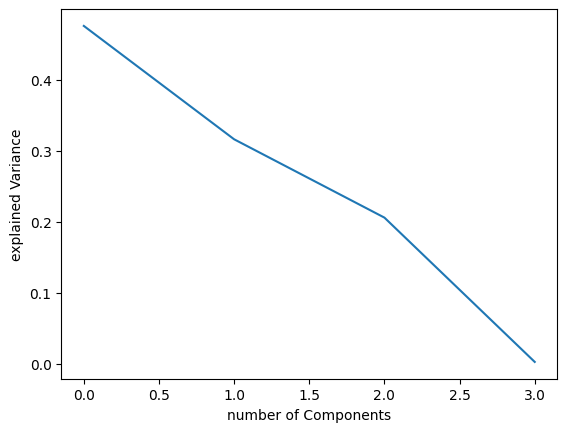

In [96]:
import matplotlib.pyplot as plt

# That shows us that with the first eigenvectors or components we can capture moren than 95% of the variance in the dataset

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of Components')
plt.ylabel('explained Variance')
plt.show()

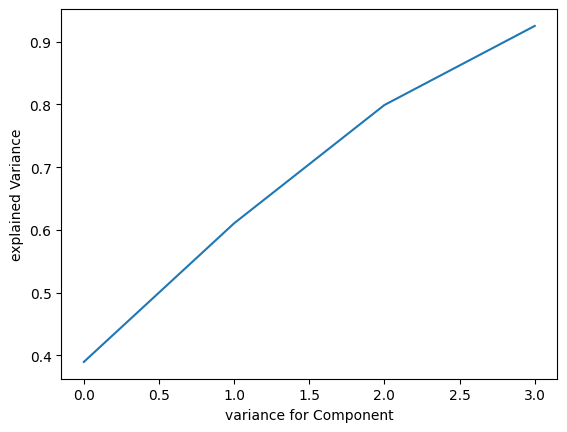

In [105]:
# now accumulating the variance for each component

acumulated_variances = []
sum = 0
for i in range(4):
    sum = sum + pca.explained_variance_ratio_[i]
    acumulated_variances.append(sum)


plt.plot(acumulated_variances)
plt.xlabel('variance for Component')
plt.ylabel('explained Variance')
plt.show()

In [97]:
# So the first two principal components caputure a variance of
print(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])

0.7915148437218809


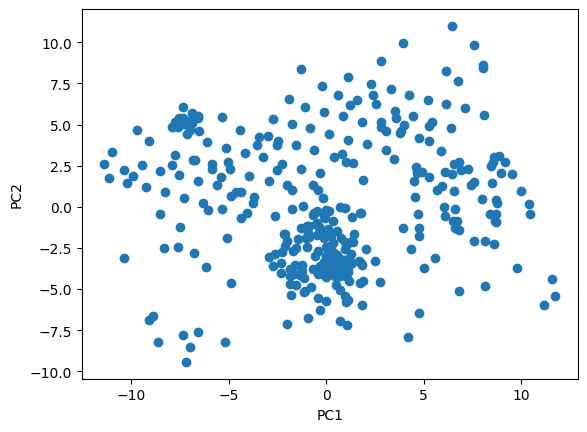

In [98]:
# plot a scatter plot of the first two principal components and color the points by their class
plt.scatter(principal_df['PC1'],principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

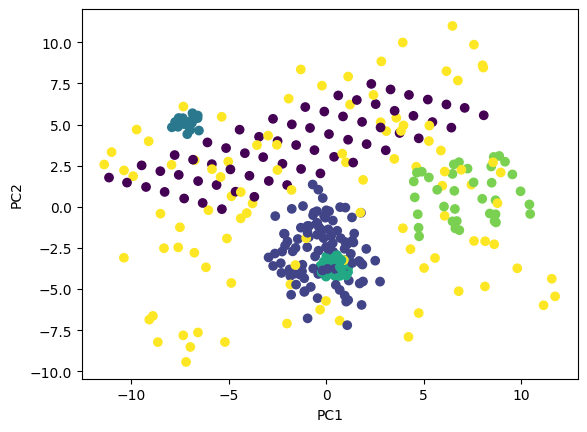

In [99]:
df = pd.concat([principal_df, y], axis=1)
plt.scatter(df['PC1'],df['PC2'], c=df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


We can see here that with PCA we can not distinguish between different classes. So it not shows good results. In further investigations there could be added other dimension. Other dimision could be added through an third axis and the fourth with for example chaning the size of the points.

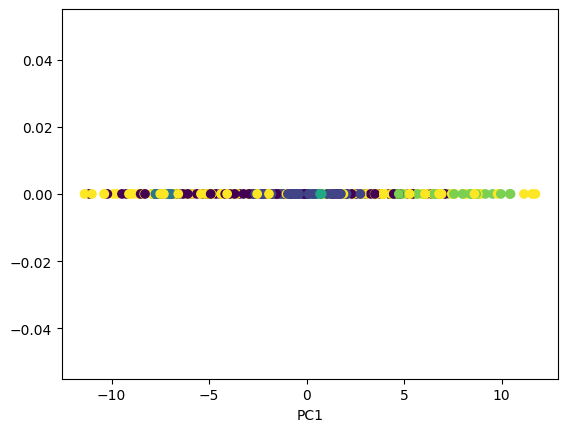

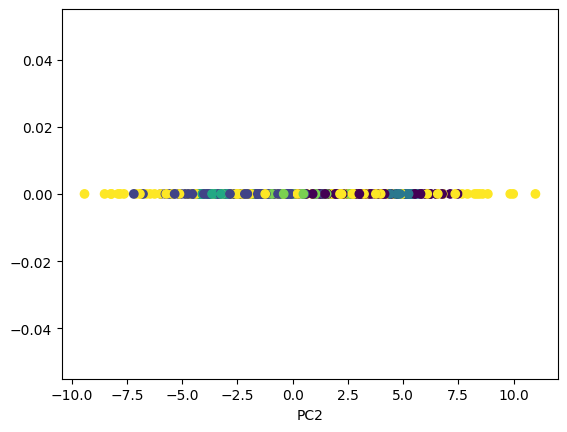

In [100]:

#Plot a scatter of only PC1
plt.scatter(df['PC1'],np.zeros(len(df)),c=df['class'])
plt.xlabel('PC1')
plt.show()

#plot a scatter of only PC2
plt.scatter(df['PC2'],np.zeros(len(df)),c=df['class'])
plt.xlabel('PC2')
plt.show()

# What we can see is that the range of values is in PC1 greater than in PC2, so in PC2 is the difference between points smaller. That menas PC1 captures more the variance between the points

# Glass Dataset

In [102]:
# load the dataset
data = pd.read_csv("glas_data_preprocessing/glas-preprocessed.csv")
data.head()

,1,2,3,4,5,6,7,8,9,10
0,0.872868,0.284953,1.000000,-0.692442,-1.127082,-0.671705,-0.145766,0.0,0.0,1
1,-0.249333,0.591817,0.801782,-0.170460,0.102319,-0.026213,-0.793734,0.0,0.0,1
2,-0.721318,0.149933,0.790646,0.190912,0.438787,-0.164533,-0.828949,0.0,0.0,1
3,-0.232831,-0.242853,0.821826,-0.310994,-0.052974,0.112107,-0.519052,0.0,0.0,1
4,-0.312045,-0.169205,0.806236,-0.411375,0.555256,0.081369,-0.624699,0.0,0.0,1


In [103]:

# we split the data, to the features for classification and the class
x= data[['1','2','3','4','5','6','7','8','9']]
y = data[['10']]
y.head()

,10
0,1
1,1
2,1
3,1
4,1


In [104]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=4)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(principal_components, columns=('PC1','PC2','PC3','PC4'))
principal_df.head()

,PC1,PC2,PC3,PC4
0,1.142310,-0.103165,0.797562,-0.952675
1,-0.660708,-0.399898,0.335197,-0.600727
2,-1.081236,-0.454561,-0.110493,-0.190729
3,-0.297773,0.052796,-0.289713,-0.565302
4,-0.540034,-0.352648,-0.587383,-0.490081


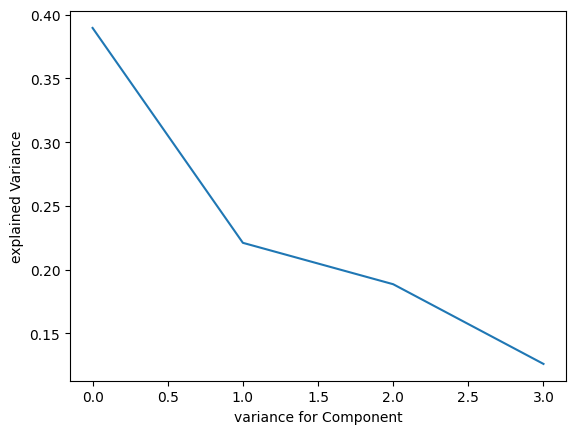

In [77]:
import matplotlib.pyplot as plt

# That shows us that with the first eigenvectors or components we can capture moren than 95% of the variance in the dataset

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('variance for Component')
plt.ylabel('explained Variance')
plt.show()

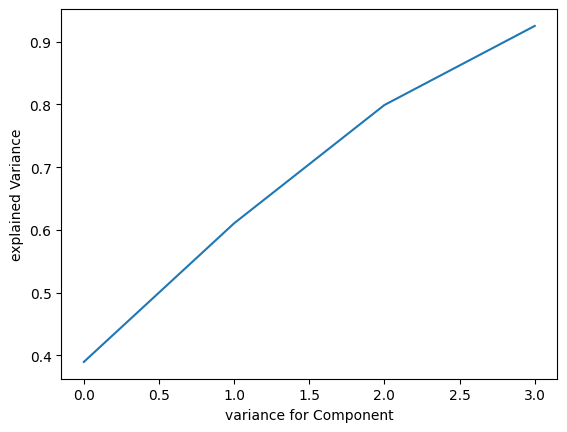

In [89]:
# now accumulating the variance for each component

acumulated_variances = []
sum = 0
for i in range(4):
    sum = sum + pca.explained_variance_ratio_[i]
    acumulated_variances.append(sum)


plt.plot(acumulated_variances)
plt.xlabel('variance for Component')
plt.ylabel('explained Variance')
plt.show()

    

In [76]:
print(pca.explained_variance_ratio_)

[0.38953709 0.22103117 0.18857728 0.12608114]


In [108]:
# So the first two principal components caputure a variance of
print(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])

0.6105682586670946


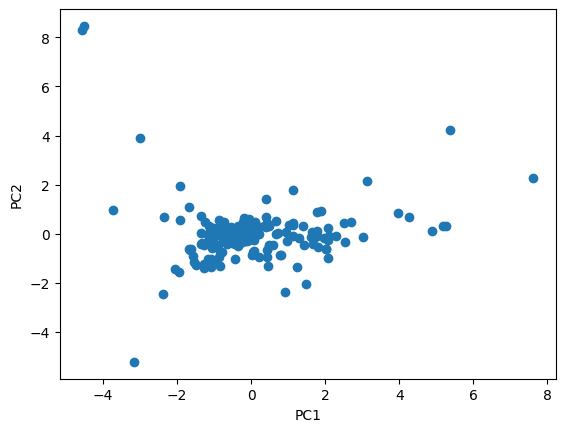

In [109]:
# plot a scatter plot of the first two principal components and color the points by their class
plt.scatter(principal_df['PC1'],principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

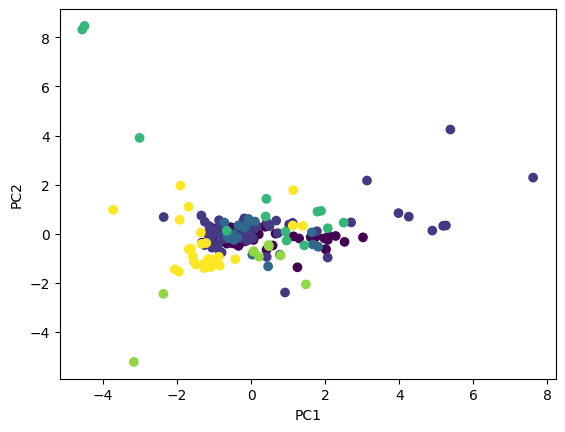

In [110]:
df = pd.concat([principal_df, y], axis=1)
plt.scatter(df['PC1'],df['PC2'], c=df['10'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can see here that with PCA we can not distinguish between different classes. So it not shows good results. In further investigations there could be added other dimension. Other dimision could be added through an third axis and the fourth with for example chaning the size of the points.